# Creation of my first neural network

## Feed Forward Back Propagation

se creará una red neuronal feed forward back propagation con una capa de entrada, una capa oculta y una capa de salida

retorpropagacion: https://www.youtube.com/watch?v=tIeHLnjs5U8

backpropagation: https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd

### Author

Fabian Castaño [GitHub](https://www.github.com/fabioc9675)

In [1]:
# importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf


In [2]:
# Carga de los datos de entrenamiento
d_train = pd.read_csv("dataset/dataset_test.csv")
d_train.head(5)
d_train.groupby('rain').describe()

# d_train = pd.read_csv("dataset/seeds_dataset.csv")
# d_train.head(5)
# d_train.groupby('salida').describe()


id                                                 temperature  \
     count  mean       std   min    25%   50%    75%   max       count   
rain                                                                     
1     30.0  15.5  8.803408   1.0   8.25  15.5  22.75  30.0        30.0   
2     33.0  47.0  9.669540  31.0  39.00  47.0  55.00  63.0        33.0   
3     34.0  80.5  9.958246  64.0  72.25  80.5  88.75  97.0        34.0   

                 ... humidity       radiation                              \
           mean  ...      75%   max     count       mean        std   min   
rain             ...                                                        
1     16.660000  ...   85.650  94.6      30.0  50.256667   5.071603  41.6   
2     18.021212  ...   75.900  79.9      33.0  53.869697  16.922368  20.1   
3     24.155882  ...   46.775  49.6      34.0  74.926471   8.351095  60.9   

                                  
         25%   50%     75%   max  
rain                              
1     45.800  50.1  54.750  58.6  
2     37.900  55.8  64.400  78.9  
3     65.975  76.4  82.175  88.6  

[3 rows x 32 columns]

## Normalizacion de dataset


In [3]:
def normDataset(x, val):
    return x/val


In [4]:
# normalizacion
d_train[['temperature', 'humidity', 'radiation']] = d_train[['temperature', 'humidity', 'radiation']].apply(
    lambda x: normDataset(x,100))
# d_train[['var_1', 'var_2','var_3','var_4','var_5','var_6','var_7']] = d_train[['var_1', 'var_2','var_3','var_4','var_5','var_6','var_7']].apply(
#     lambda x: normDataset(x,100))

d_train.head(5)


,id,temperature,humidity,radiation,rain
0,1,0.145,0.810,0.456,1
1,2,0.186,0.934,0.455,1
2,3,0.158,0.666,0.549,1
3,4,0.179,0.786,0.416,1
4,5,0.149,0.888,0.512,1


In [5]:
# clean data
dataset = d_train.dropna()

# convert categorical 'Origin' data into one-hot data
# origin = dataset.pop('salida')
origin = dataset.pop('rain')
dataset['pequena'] = (origin == 1)*1
dataset['mediana'] = (origin == 2)*1
dataset['grande'] = (origin == 3)*1

dataset.tail()

,id,temperature,humidity,radiation,pequena,mediana,grande
92,93,0.221,0.425,0.803,0,0,1
93,94,0.247,0.487,0.609,0,0,1
94,95,0.264,0.489,0.636,0,0,1
95,96,0.215,0.323,0.650,0,0,1
96,97,0.262,0.496,0.782,0,0,1


## Separacion de los datos

agrupar los datos de entrenamiento y de validacion, separar las entradas de las salida y convertir las salidas en un vector de la forma [0,0,0] a paritr del dato


In [6]:
# d_train_x = dataset[['var_1', 'var_2','var_3','var_4','var_5','var_6','var_7']].to_numpy()
d_train_x = dataset[['temperature', 'humidity','radiation']].to_numpy()
d_train_y = dataset[['pequena','mediana','grande']].to_numpy()

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(d_train_x, d_train_y, test_size=0.3)

## Network creation

creation of neural network class


In [7]:
# Using Keras more complex model
# model
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation='sigmoid', input_shape=[3]), #  Hidden layer of 5 neurons with 3 input
    tf.keras.layers.Dense(units=4, activation='sigmoid'), #  intermediate layer
    tf.keras.layers.Dense(units=3, activation='sigmoid'),
])

print(modelo.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.01),
    loss = 'mean_squared_error'
)

#  modelo.sumary()

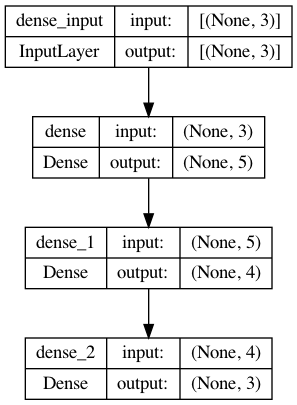

In [9]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(modelo, to_file=dot_img_file, show_shapes=True)

## Model creation and training

Creation of the model to predict seeds distribution

In [10]:
print("Comienza entrenamiento...")
history = modelo.fit(x_train, y_train, epochs = 1000, batch_size=30, verbose = False)
print("Modelo entrenado!")

Comienza entrenamiento...
Modelo entrenado!


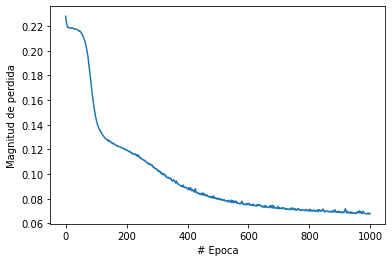

In [11]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(history.history["loss"])

## Validation process

validate the Neural Network working with test data

In [12]:
# Make the prediction on test data and measure performance
print(x_test.shape)
y_pred = modelo.predict(x_test)

y_test_out = np.argmax(y_test, axis=1)
y_pred_out = np.argmax(y_pred, axis=1)
print(f"Accuracy Score: {np.round(accuracy_score(y_test_out, y_pred_out)*100,2)}")

(30, 3)
1/1 [==============================] - 0s 123ms/step
Accuracy Score: 86.67


In [13]:
# print some data test
for i in range(10):
    print(f"predict: {y_pred_out[i]}, target: {y_test_out[i]}")

predict: 0, target: 0
predict: 2, target: 2
predict: 0, target: 1
predict: 0, target: 0
predict: 0, target: 0
predict: 0, target: 1
predict: 2, target: 2
predict: 0, target: 0
predict: 1, target: 1
predict: 1, target: 0
